# ML First Phase_Practice _Project

# Red Wine Quality Prediction Project

Red Wine Quality Prediction Project

Project Description:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration:

Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-

https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
#Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/BHAVITH/OneDrive/Desktop/Shwetha Data trained/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

# Exploratory Data Analysis (EDA)¶

In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are 2 different type of data(int64,float )present in the dataset.

In [10]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This gives the brief about the dataset which includes indexing type, columns,no null values and memory usage.

In [11]:
#All columns has the same number of data points

extra = df[df.duplicated()]
extra.shape

(240, 12)

In [12]:
print ("Total Duplicate Rows are", df.duplicated().sum)

Total Duplicate Rows are <bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool>


In [13]:
print ("Total Duplicate Rows are", df.duplicated().sum())

Total Duplicate Rows are 240


In [14]:
df1=df.drop_duplicates(inplace=True)

In [15]:
extra = df[df.duplicated()]
extra.shape

(0, 12)

In [16]:
print ("Total Duplicate Rows are", df.duplicated().sum())

Total Duplicate Rows are 0


In [17]:
df.shape

(1359, 12)

In [18]:
#checking the null values- Missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

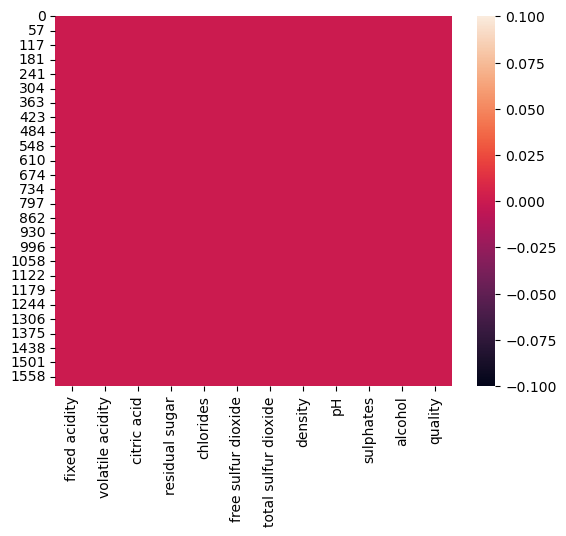

In [19]:
sns.heatmap(df.isnull())

we can clearly visualize that there is no missing data present.

In [20]:
df.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.171231          0.578596     0.244523        2.509532   
6             8.337383          0.496084     0.279364        2.457290   
7             8.858683          0.403653     0.371856        2.716766   
8             8.441176          0.427647     0.382941        2.576471   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.093971            17.161179             57.406412  0.997082   
6         0.085075            15.637383             40.816822  0.996565   
7         0.076832            13.994012             35.449102  0.996051   
8         0.068353            13.764706             34.470588  0.995095   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.300815   0.623570   9.888562  
6        3.318000   0.674542  10.658879  
7        3.290060   0.742635  11.491118  
8        3.274118   0.774706  12.158824

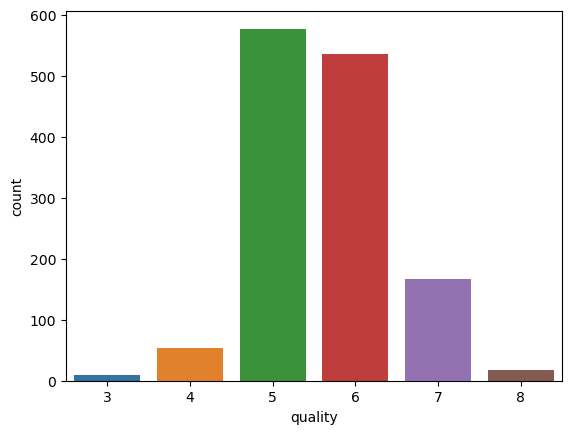

In [21]:
sns.countplot(df['quality'])
plt.show()

In [22]:
df.nunique().to_frame("No. of unique values")

No. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

In [23]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [24]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [25]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [26]:
df['quality'].nunique()

6

In [27]:
# Checking the values counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n") 


7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0     53
17.0

These are the values counts of all columns and we dont find any blank in column

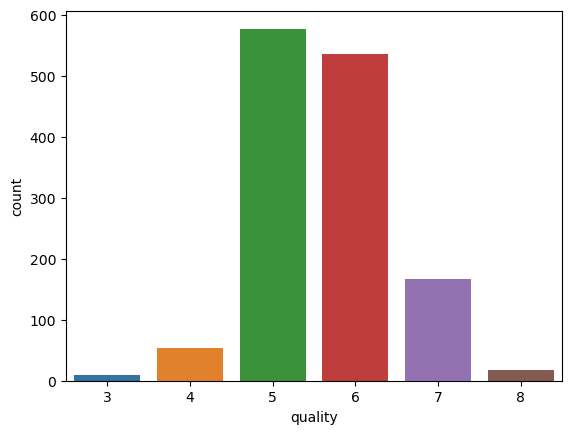

In [28]:
sns.countplot(df['quality'])
plt.show()

In [29]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

This gives the statistical informed of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can absoerve the following:-

1) The counts of all the columns are same which means there are no missing values in the dataset.

2) The means value is greater than the median(50%) in fixed acidity,residual sugar and free sulfur dioxide,total sulfur dioxide, alcohol,which means the data is skewed to right in these

3) By summarizing the data we can observe there is huge differeces between 75% and max hence there are outliers present in the data.

5) We can also notice the standard deviation, min,25% percantile values from this describe method

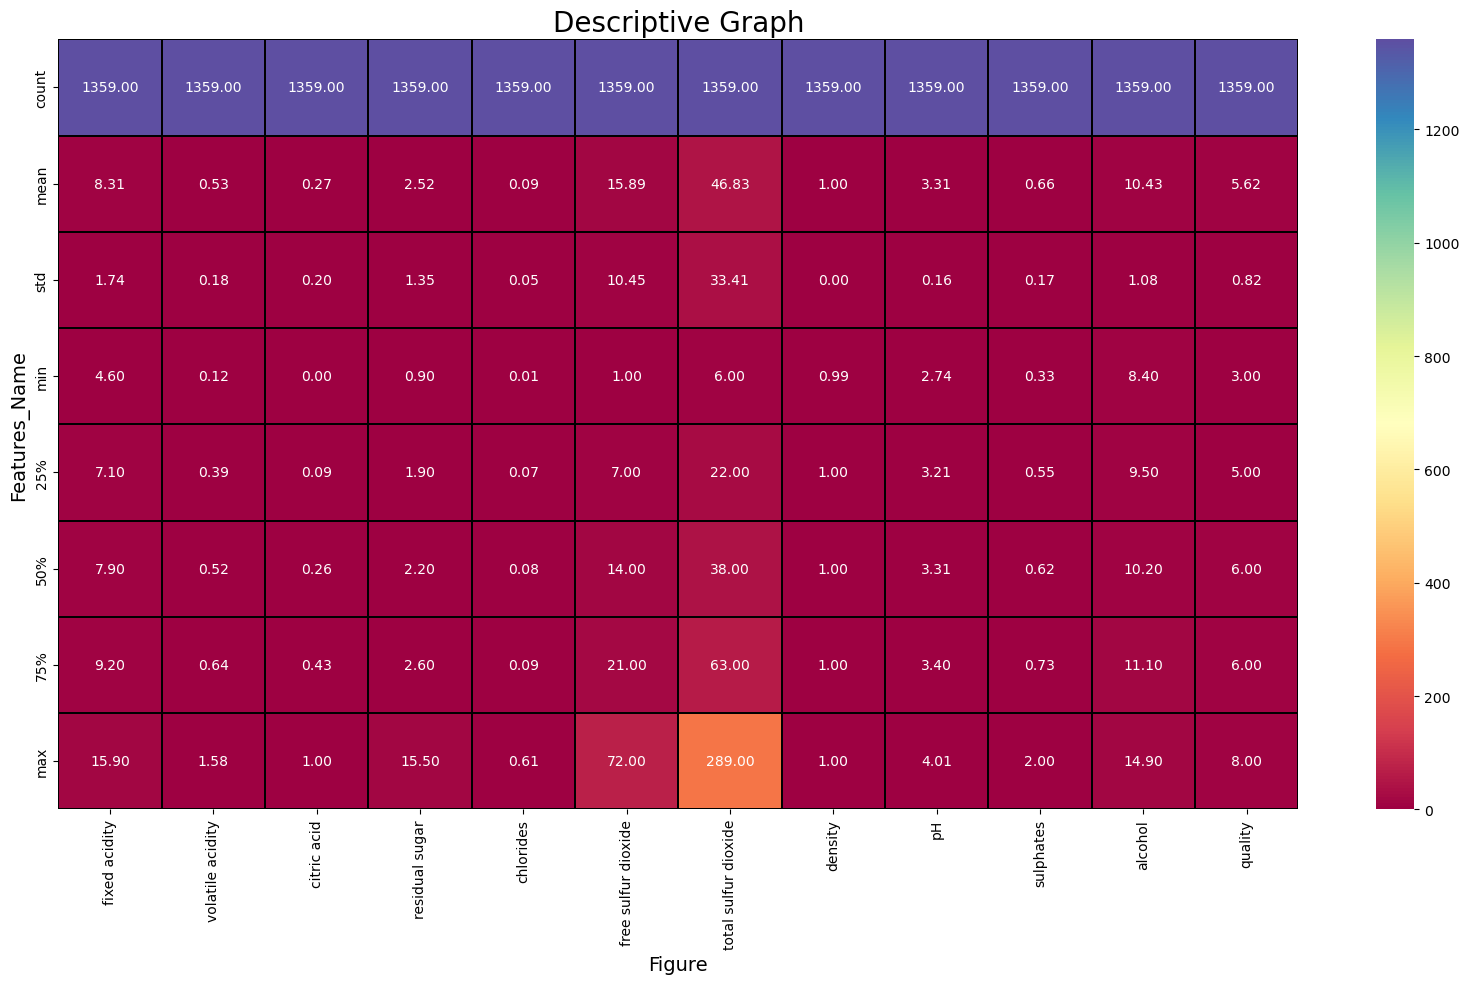

In [30]:
plt.figure(figsize =(20,10))
sns.heatmap(df.describe(), annot =True, fmt ='0.2f',linewidth = 0.2, linecolor ='black',cmap = 'Spectral')
plt.xlabel ('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph',fontsize =20)
plt.show()

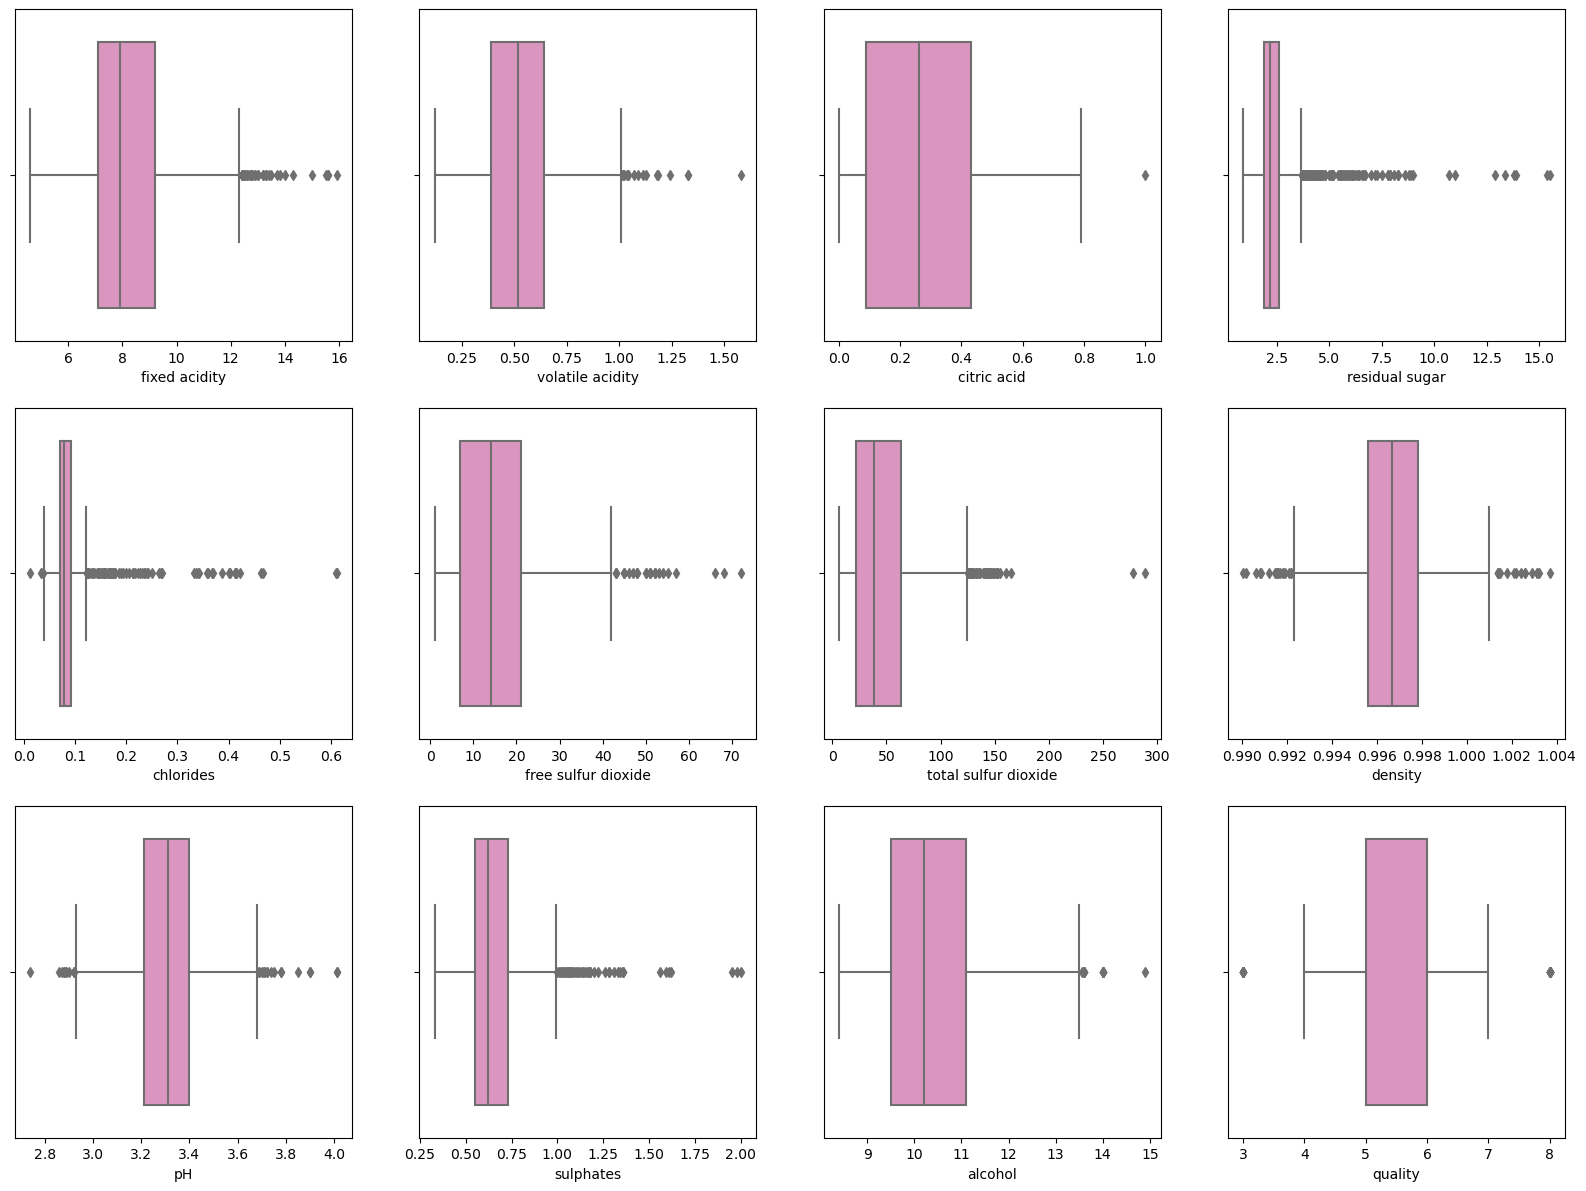

In [31]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
    p+=1
    

plt.show()

<AxesSubplot:>

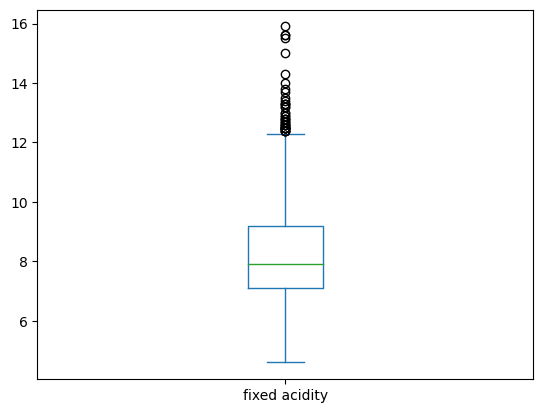

In [32]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

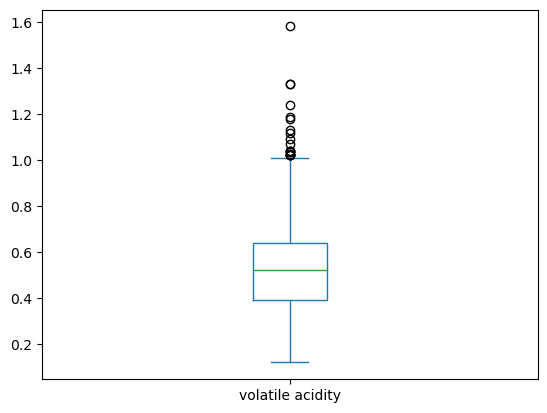

In [33]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

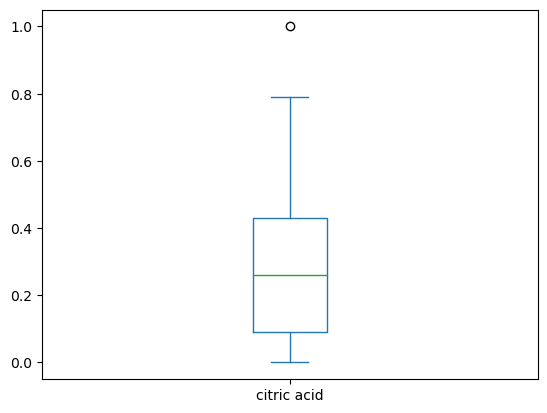

In [34]:
df['citric acid'].plot.box()

<AxesSubplot:>

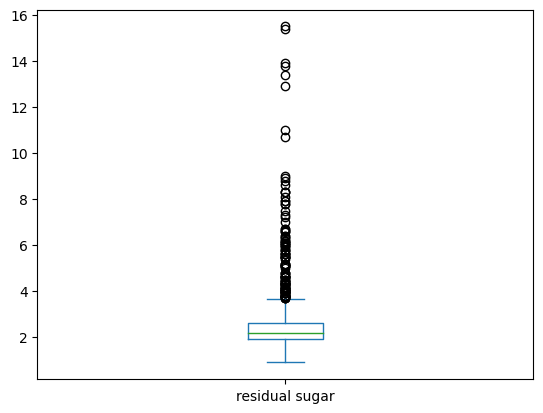

In [35]:
df['residual sugar'].plot.box()

<AxesSubplot:>

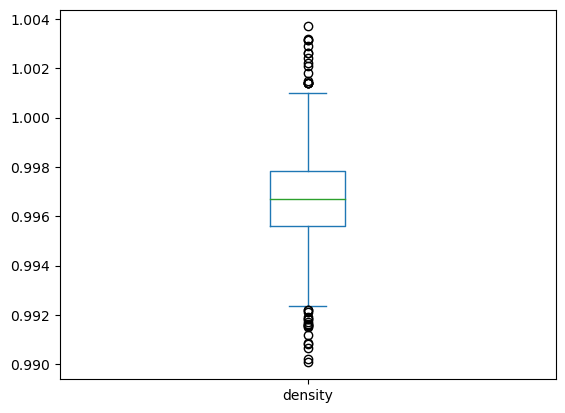

In [36]:
df['density'].plot.box()

fixed acidity              AxesSubplot(0.125,0.53;0.0945122x0.35)
volatile acidity        AxesSubplot(0.238415,0.53;0.0945122x0.35)
citric acid             AxesSubplot(0.351829,0.53;0.0945122x0.35)
residual sugar          AxesSubplot(0.465244,0.53;0.0945122x0.35)
chlorides               AxesSubplot(0.578659,0.53;0.0945122x0.35)
free sulfur dioxide     AxesSubplot(0.692073,0.53;0.0945122x0.35)
total sulfur dioxide    AxesSubplot(0.805488,0.53;0.0945122x0.35)
density                    AxesSubplot(0.125,0.11;0.0945122x0.35)
pH                      AxesSubplot(0.238415,0.11;0.0945122x0.35)
sulphates               AxesSubplot(0.351829,0.11;0.0945122x0.35)
alcohol                 AxesSubplot(0.465244,0.11;0.0945122x0.35)
quality                 AxesSubplot(0.578659,0.11;0.0945122x0.35)
dtype: object

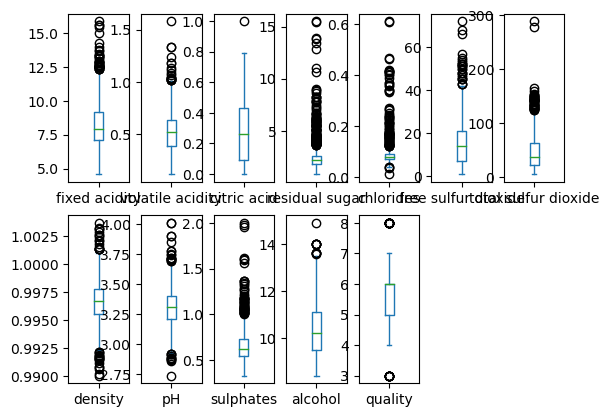

In [37]:
df.plot(kind='box',subplots=True,layout=(2,7))

So we have found outlier in all Columns

So, removing the outlier using Zscore and IQR tecniues before building the model and selected best one.

We have removed the skewness using zscore method.

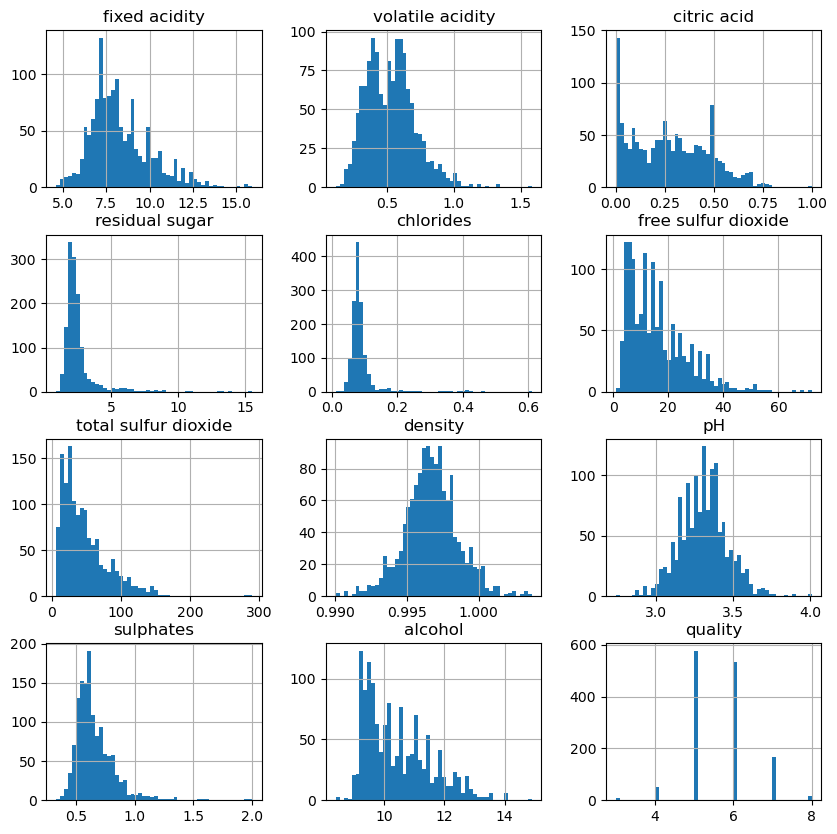

In [38]:
df.hist(figsize=(10,10),bins=50)
plt.show()

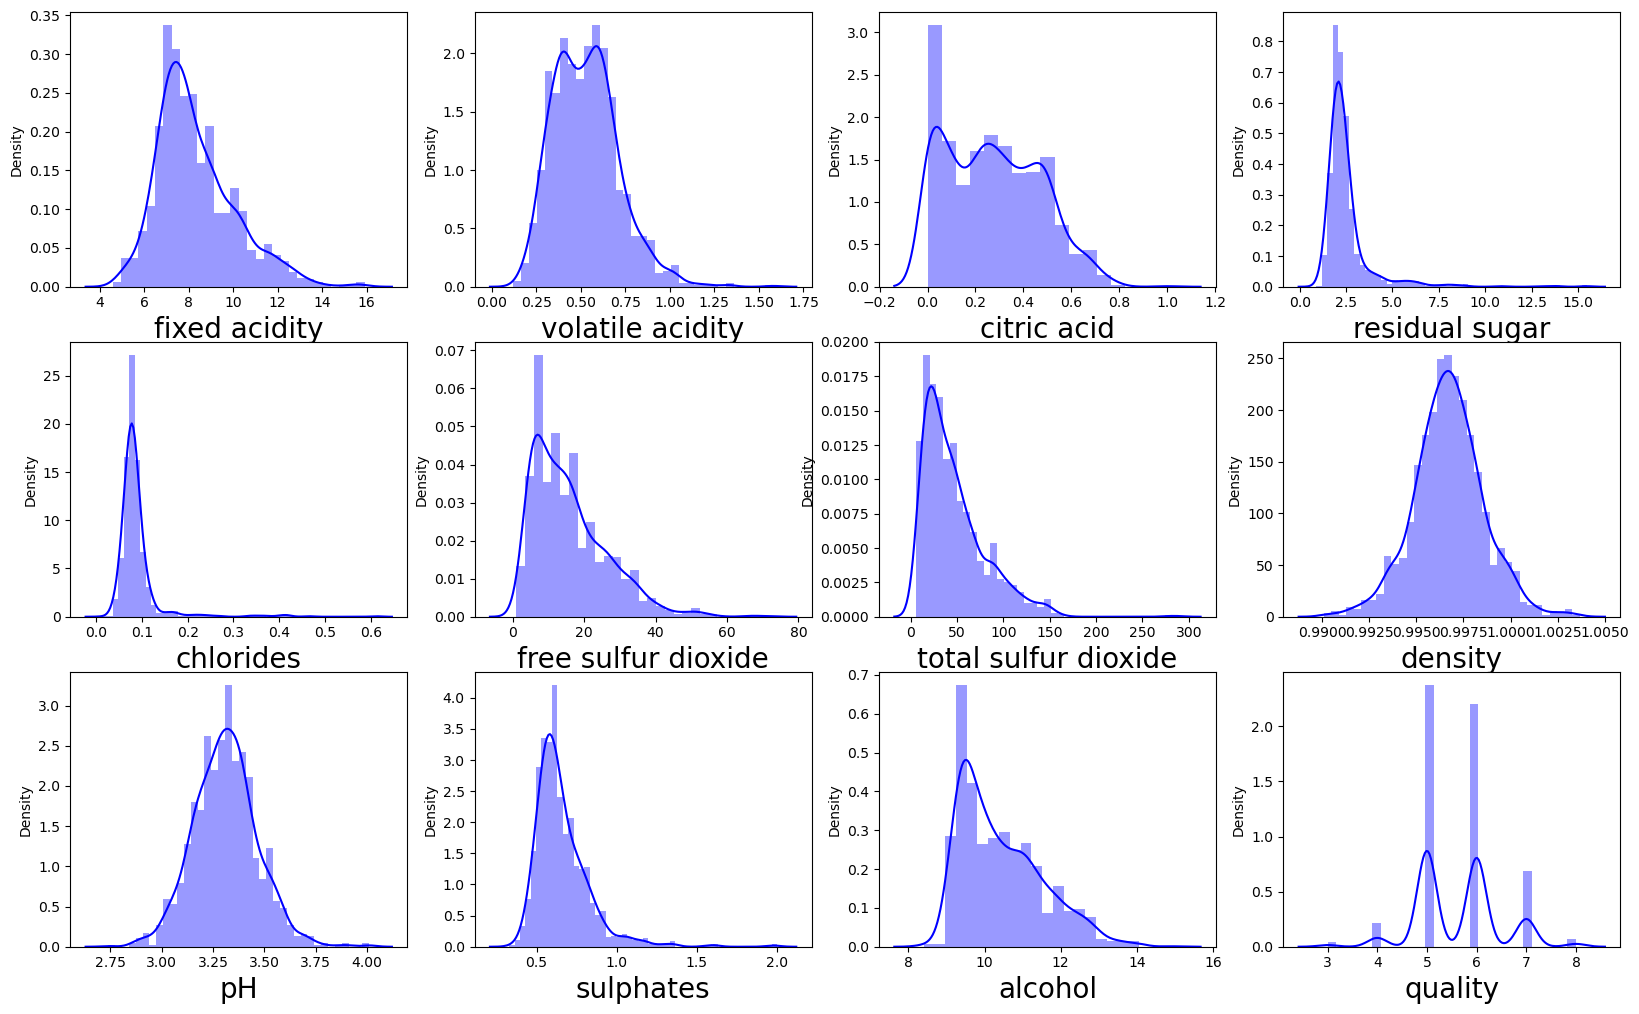

In [39]:
plt.figure(figsize=(20,25) , facecolor ='white')

plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column,fontsize =20)
    plotnumber+=1
plt.show()

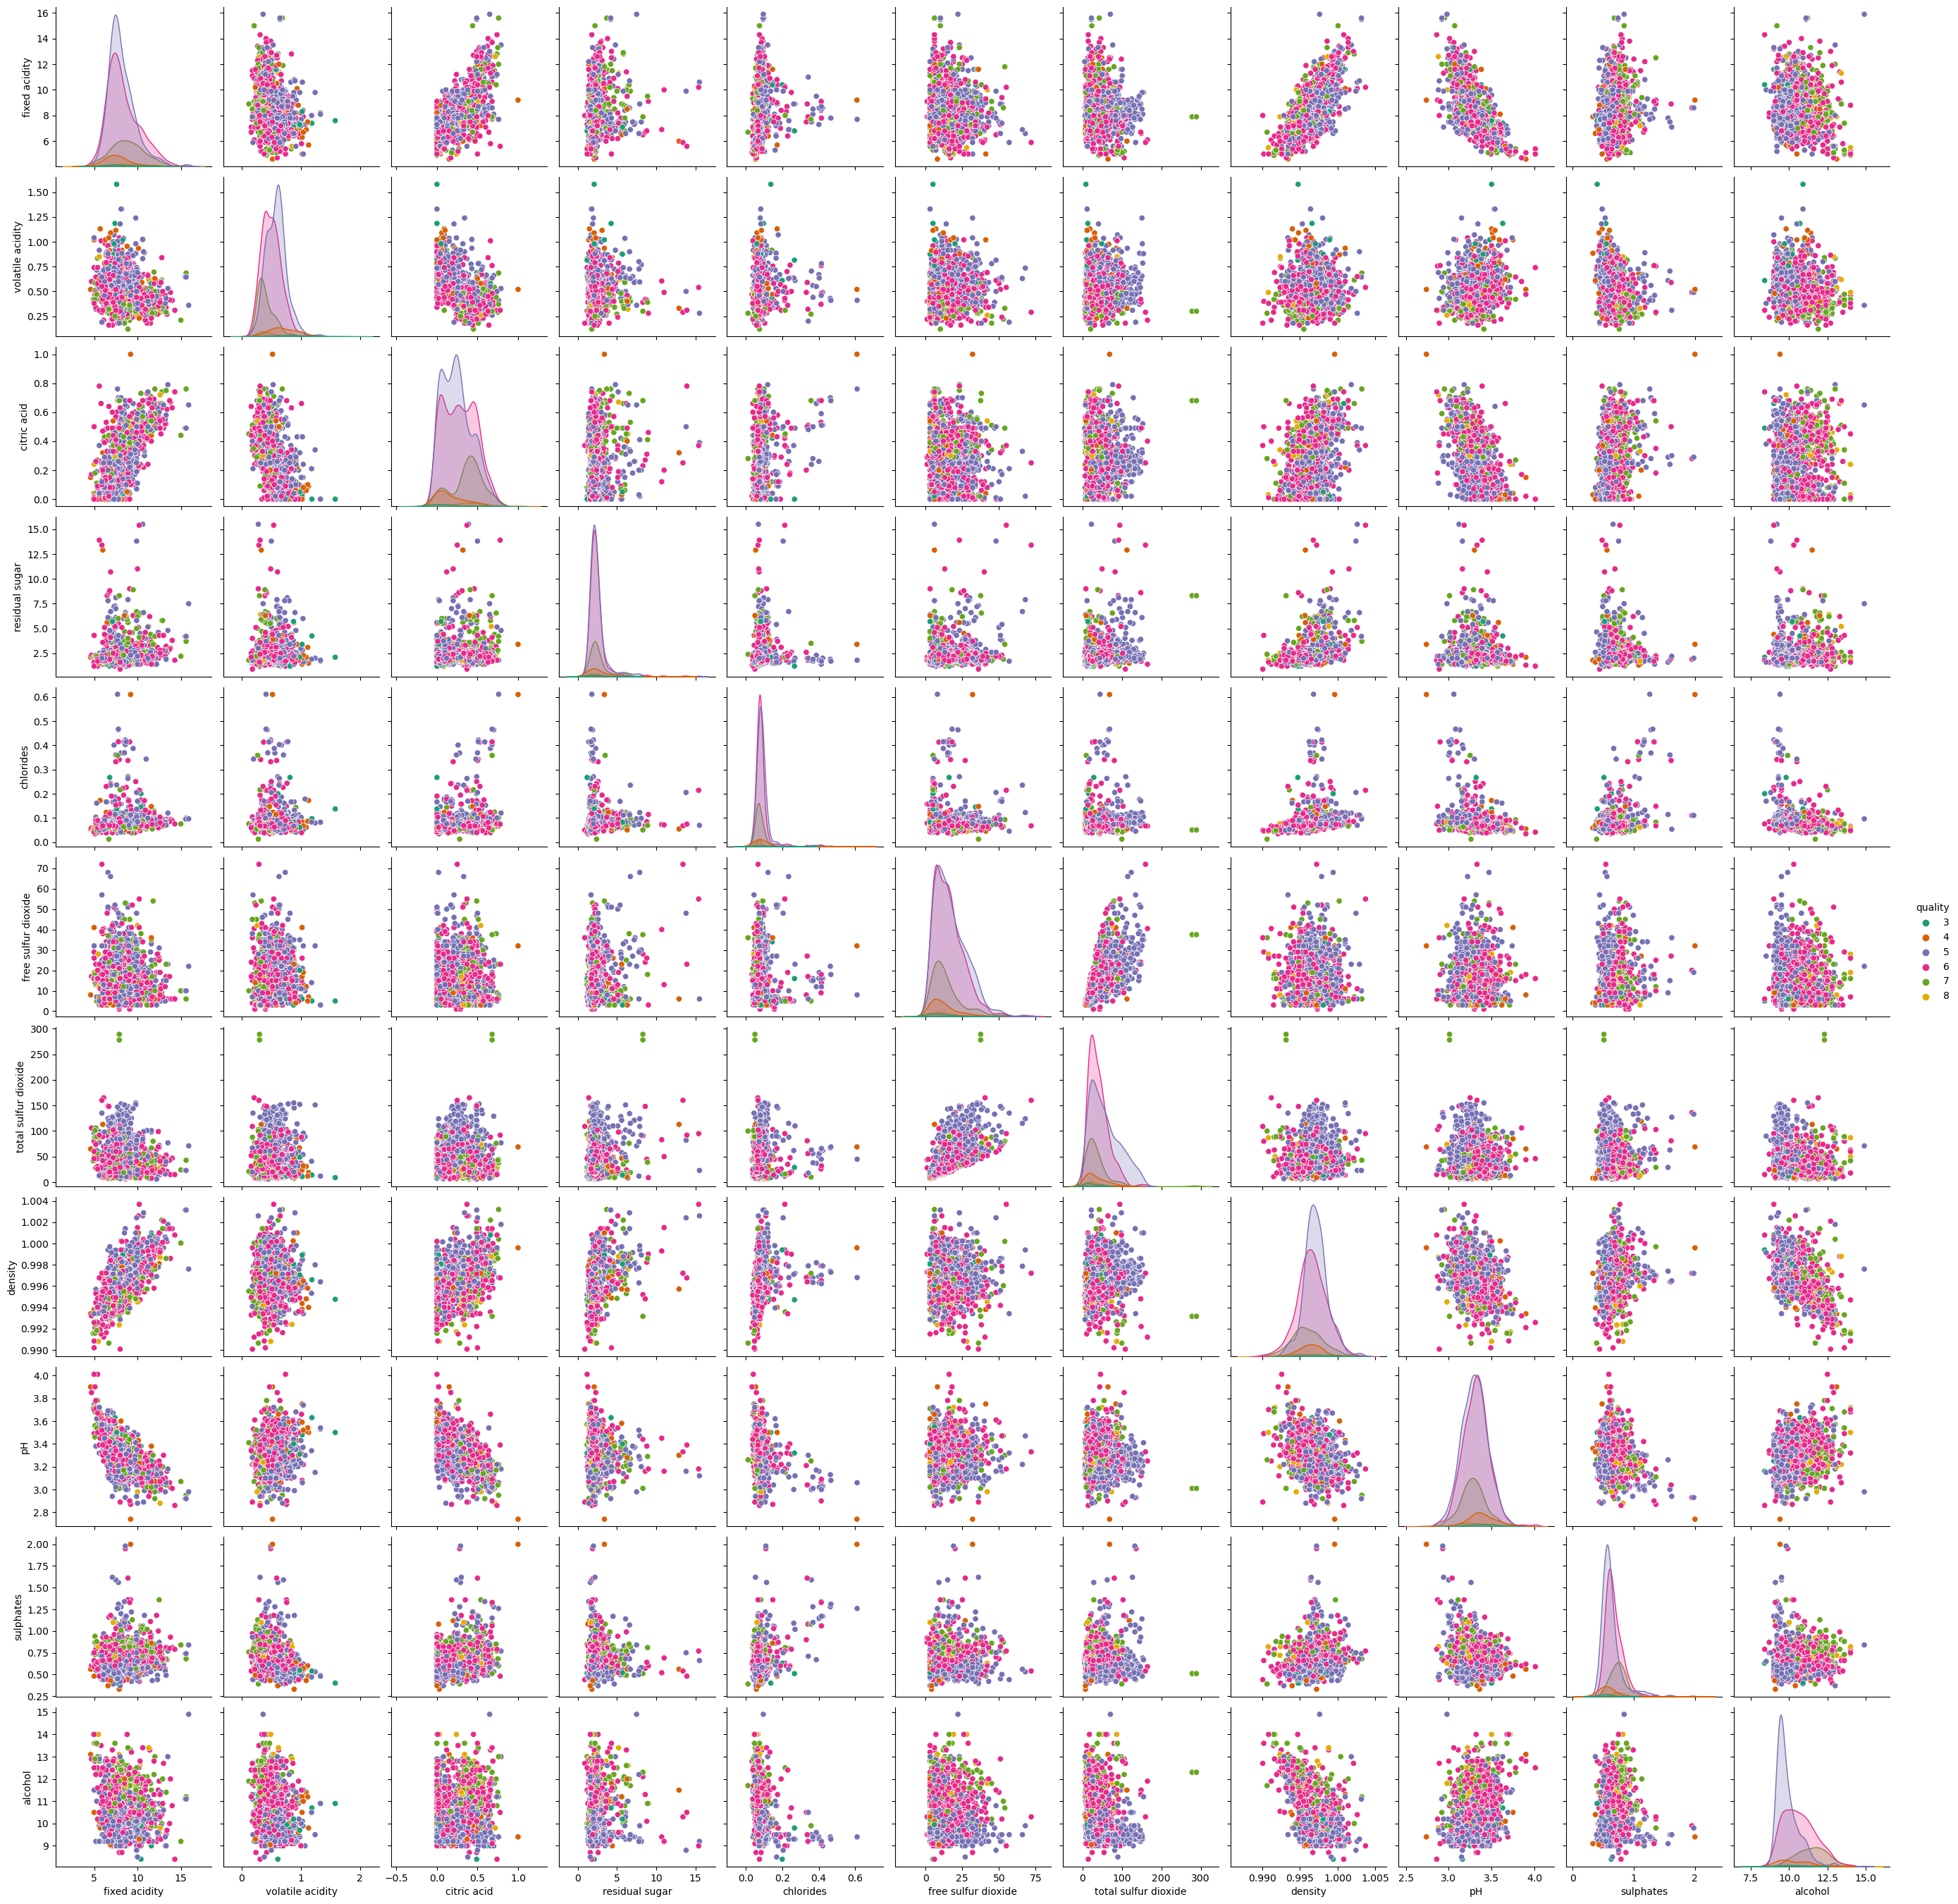

In [40]:
sns.pairplot(df,hue ="quality",palette = "Dark2")
plt.show()

In [41]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

Default acceptable range for skewness is negative 0.5 to positve 0.5

# Removing outlier

In [42]:
# Removing skewness using Zscore method
from scipy.stats import zscore
z=np.abs(zscore(df))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.524431          0.932000     1.393258        0.461157   0.245623   
1          0.294063          1.915800     1.393258        0.056665   0.200094   
2          0.294063          1.259934     1.188617        0.165259   0.078535   
3          1.664067          1.363534     1.471711        0.461157   0.265883   
5          0.524431          0.713378     1.393258        0.535132   0.265883   
...             ...               ...          ...             ...        ...   
1593       0.869983          0.494756     0.983977        0.461157   0.407702   
1594       1.215536          0.385444     0.983977        0.387183   0.038015   
1595       1.388312          0.112167     0.881656        0.239233   0.529261   
1597       1.388312          0.631395     0.779336        0.387183   0.265883   
1598       1.330720          1.199567     1.011270        0.796410   0.427962   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.468554              0.384050  0.584003  1.291872   
1                0.872003              0.604073  0.048737  0.708395   
2                0.085537              0.214813  0.155790  0.321247   
3                0.105971              0.394471  0.691057  0.966495   
5                0.277045              0.204391  0.584003  1.291872   
...                   ...                   ...       ...       ...   
1593             1.159265              0.264277  0.106490  0.711149   
1594             1.542281              0.084619  0.968269  0.904724   
1595             2.212559              0.124983  0.850510  1.356397   
1597             1.542281              0.084619  0.663167  1.679021   
1598             0.201725              0.144505  0.652461  0.517575   

      sulphates   alcohol   quality  
0      0.578561  0.954374  0.757040  
1      0.124822  0.584575  0.757040  
2      0.051024  0.584575  0.757040  
3      0.461331  0.584575  0.457621  
5      0.578561  0.954374  0.757040  
...         ...       ...       ...  
1593   0.945435  0.861924  0.457621  
1594   0.461331  0.062574  0.757040  
1595   0.593744  0.709723  0.457621  
1597   0.300667  0.214775  0.757040  
1598   0.007591  0.524824  0.457621  

[1359 rows x 12 columns]

In [43]:
# threshold = 3
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  400,  408,  420,  420,  433,  448,  450,
         473,  483,  483,  485,  485,  492,  506,  510,  513,  516,  528,
         534,  555,  562,  562,  564,  565,  565,  565,  582,  582,  592,
         597,  597,  599,  602,  626,  627,  632,  652,  671,  672,  687,
         710,  718,  722,  764,  764,  771,  781,  786,  791,  792,  838,
         866,  888,  895,  895,  912,  918,  918,  920,  920,  945,  948,
         963,  985,  994, 1003, 1013, 1049, 1052, 1060, 1060, 1060, 1073,
        1081, 1081, 1082, 1082, 1103, 1106, 1106, 1107, 1117, 1121, 1123,
        1123, 1125, 1151, 1159, 1162, 

In [44]:
#threshold for zscore values---->above 3 are considered outliers

threshold=3
np.where(z<3)

(array([   0,    0,    0, ..., 1358, 1358, 1358], dtype=int64),
 array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))

We have removed the skewness using zscore method.

In [45]:
z.iloc[0,2]

1.3932579682543467

In [46]:
z.iloc[0,1]

0.9320001518998713

In [47]:
# Now removing the data above Zscore and creating new DF
df1= df[(z<3).all(axis =1)]

df1.shape

(1232, 12)

In [48]:
# shape of Old and New DataFrame

print("old Data Frame -", df.shape[0])

print("New Data Frame -", df1.shape[0])

old Data Frame - 1359
New Data Frame - 1232


In [49]:
print("Data Loss percentage -",((df.shape[0]- df1.shape[0])/df.shape[0])*100)

Data Loss percentage - 9.345106696100073


In [50]:
df=df1

it is affordable loss of data now we will check with IQR

In [51]:
df1.shape

(1232, 12)

# Checking for Skewness

In [52]:
df.skew()

fixed acidity           0.807145
volatile acidity        0.433613
citric acid             0.276303
residual sugar          2.374715
chlorides               2.464749
free sulfur dioxide     0.867289
total sulfur dioxide    1.162598
density                 0.017683
pH                      0.118752
sulphates               0.950578
alcohol                 0.767349
quality                 0.402697
dtype: float64

So By default, skewness values is acceptable skewness value is negative 0.5 to positive +0.5 Here my volume not that range.

# Checking how the data has been distributed in each column:

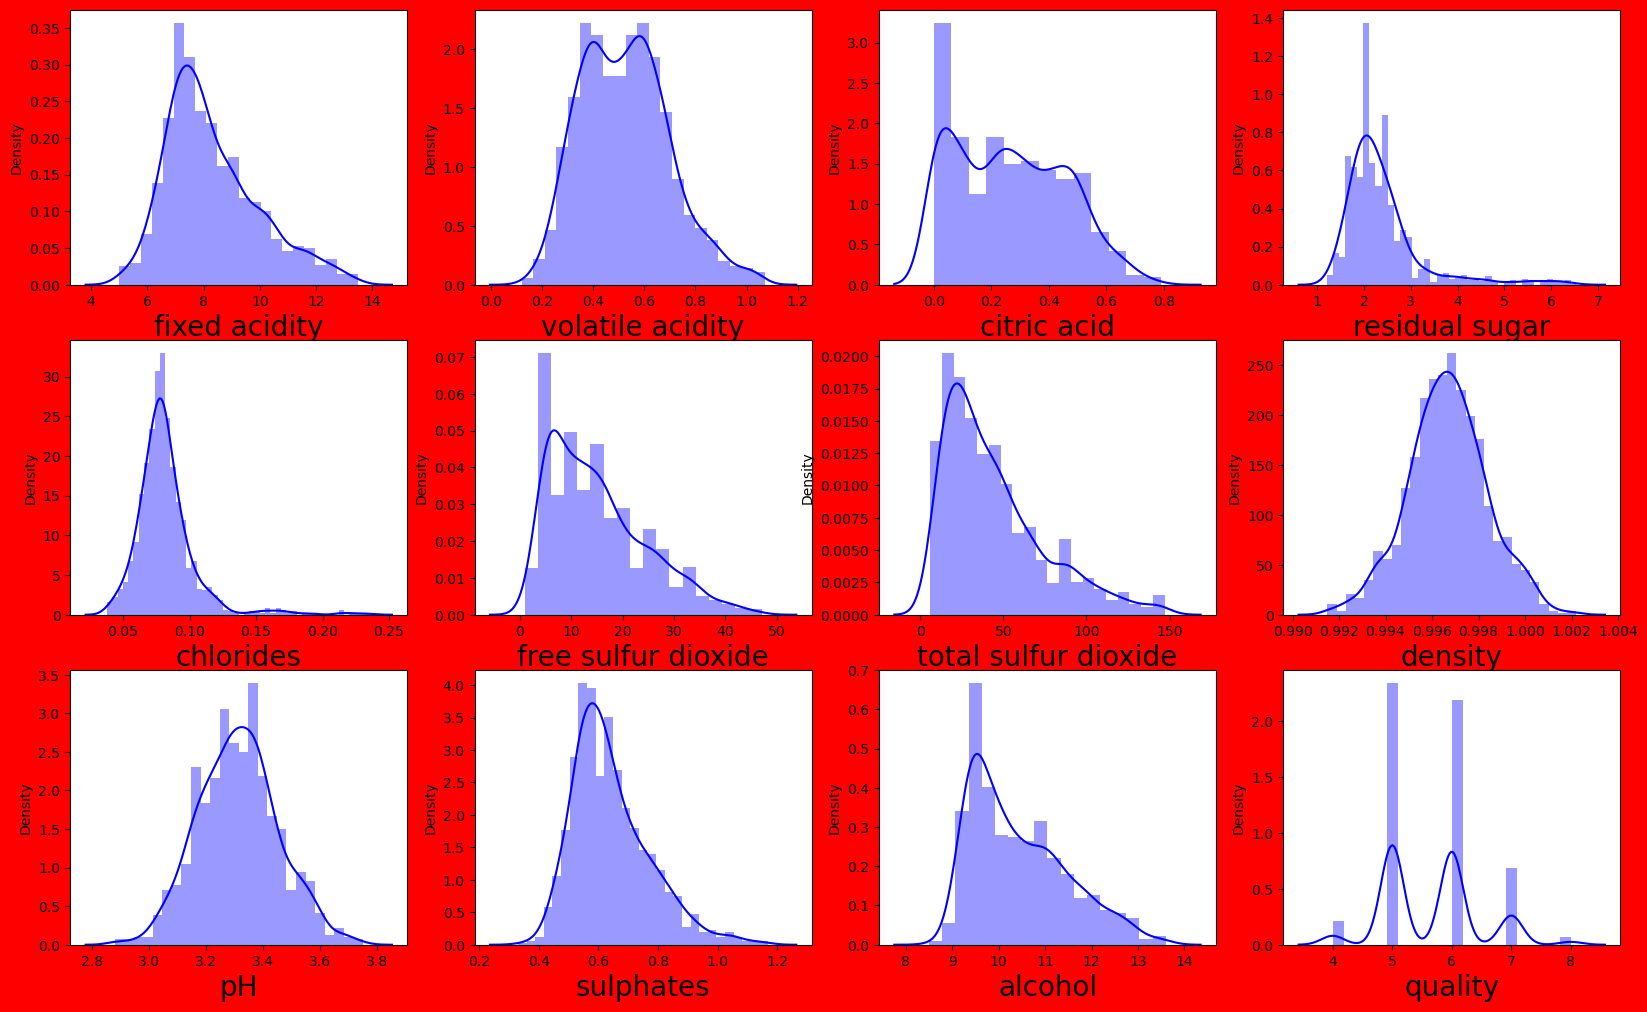

In [53]:
plt.figure(figsize=(20,25) , facecolor ='red')

plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column,fontsize =20)
    plotnumber+=1
plt.show()

So By default, skewness values is acceptable skewness value is negative 0.5 to positive +0.5 Here my volume not that range.

# Removing skewness

In [54]:
# Removing skewness using cuberoot method

df['chlorides'] = np.cbrt(df['chlorides'])

In [55]:
df['total sulfur dioxide'] = np.cbrt(df['total sulfur dioxide'])

In [56]:
df['residual sugar'] = np.cbrt(df['residual sugar'])

In [57]:
df['fixed acidity'] = np.cbrt(df['fixed acidity'])

We have removed the skewness using cube root method.

In [58]:
df.skew()

fixed acidity           0.507544
volatile acidity        0.433613
citric acid             0.276303
residual sugar          1.527389
chlorides               1.162982
free sulfur dioxide     0.867289
total sulfur dioxide    0.333459
density                 0.017683
pH                      0.118752
sulphates               0.950578
alcohol                 0.767349
quality                 0.402697
dtype: float64

So By default, skewness values is acceptable skewness value is negative 0.5 to positive +0.5 Here my volume not that range.

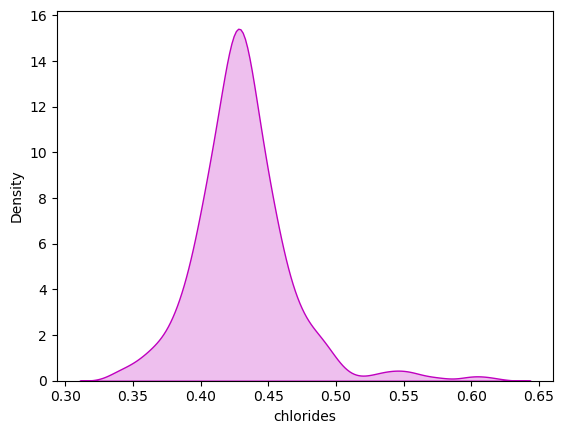

In [59]:
# lets visualize how the data has been distributed in chlorides after removing skewness
sns.kdeplot(df['chlorides'], color="m", fill=True)

plt.show()

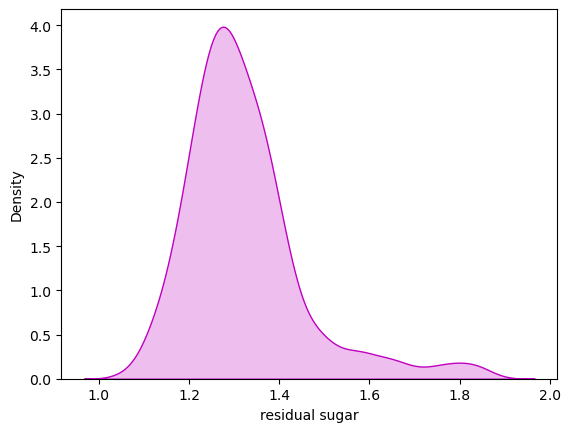

In [60]:
# lets visualize how the data has been distributed in chlorides after removing skewness
sns.kdeplot(df['residual sugar'], color="m", fill=True)

plt.show()

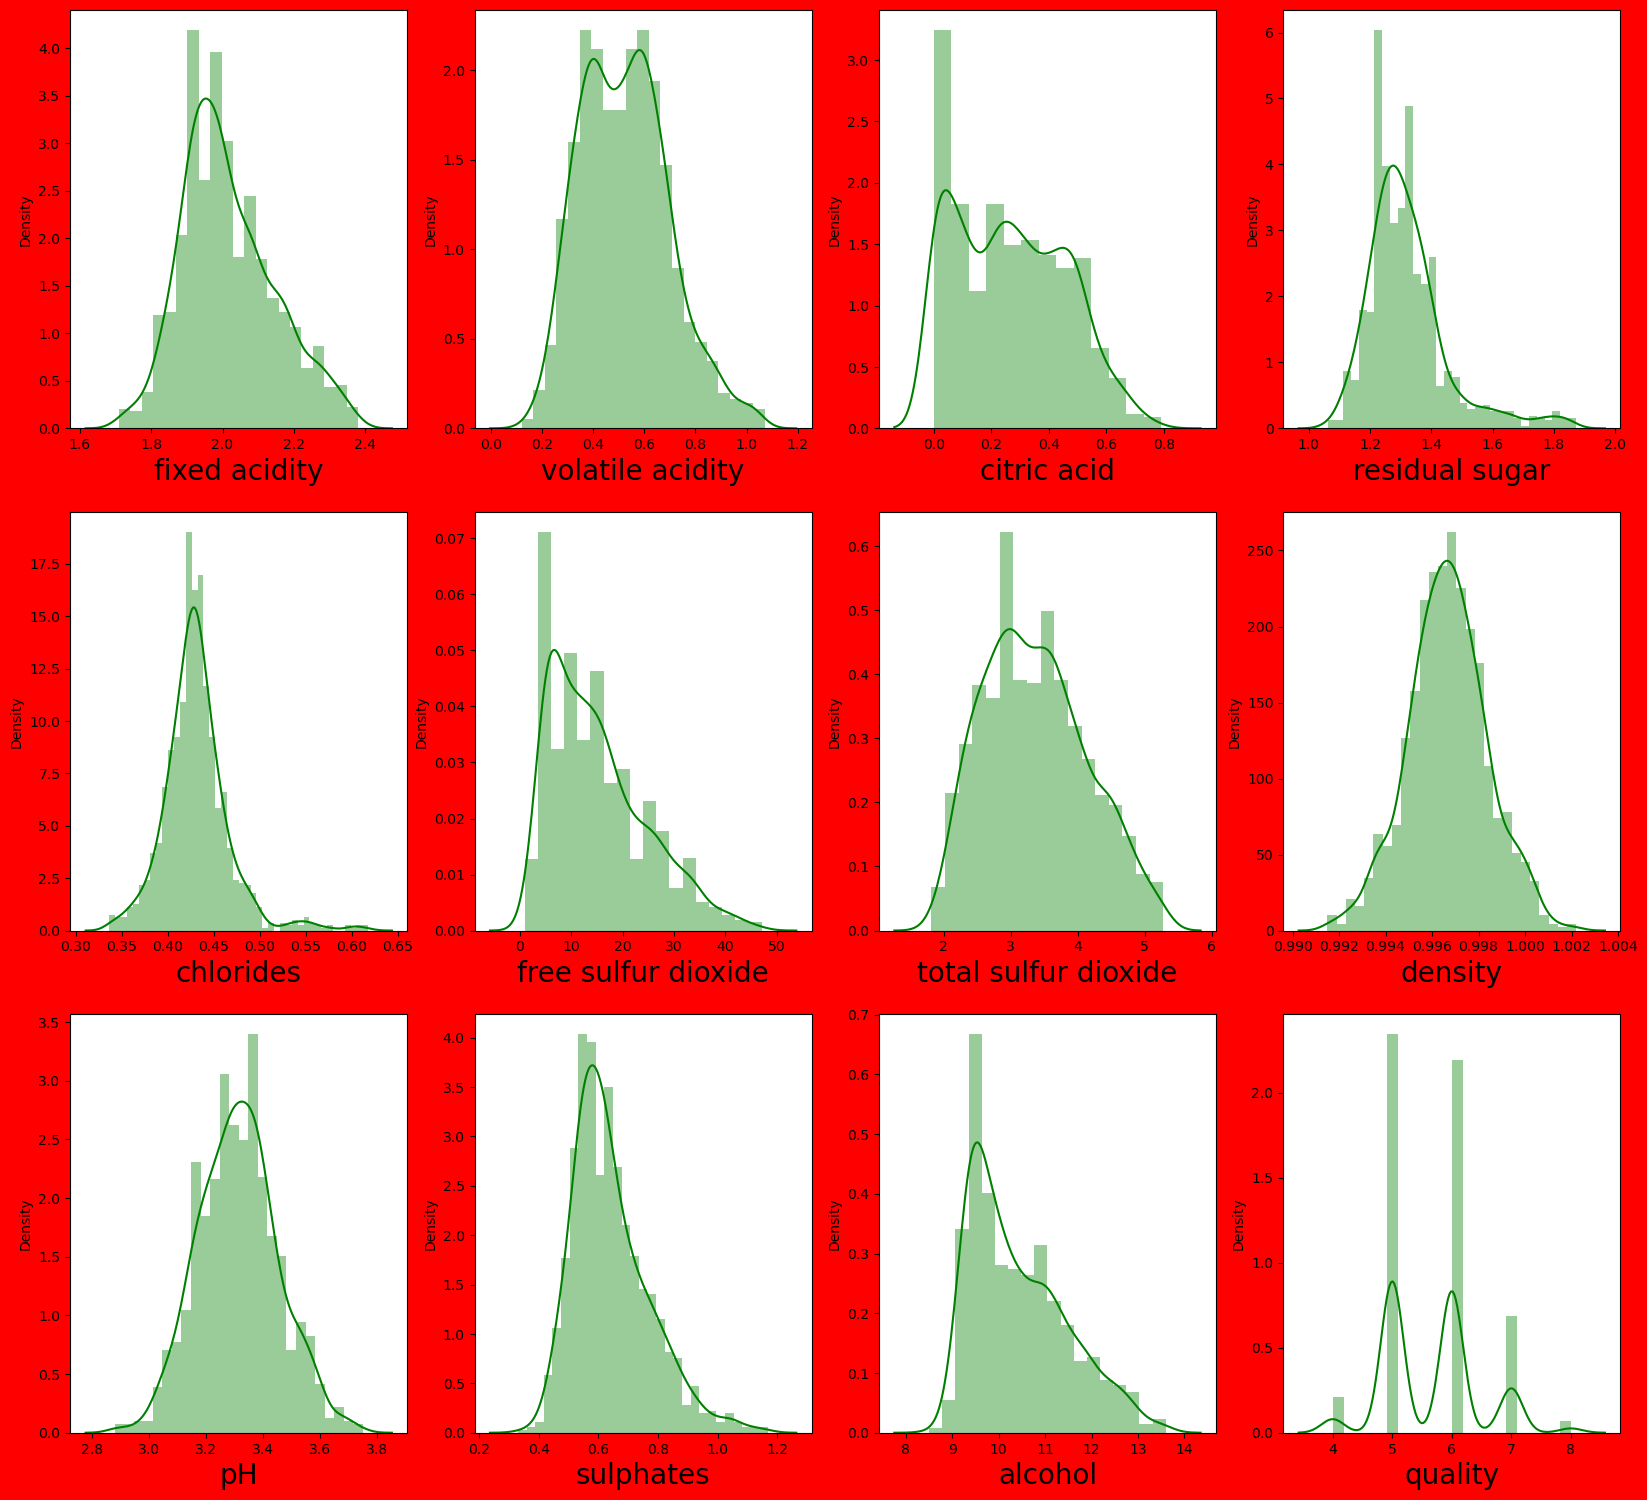

In [61]:
# let us visualize again
plt.figure(figsize=(20,25) , facecolor ='red')

plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color ='green')
        plt.xlabel(column,fontsize =20)
    plotnumber+=1
plt.show()

This looks almost normal and skewness is also removed

In [62]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1232.000000       1232.000000  1232.000000     1232.000000   
mean        2.016535          0.524144     0.266266        1.320772   
std         0.129997          0.171969     0.190753        0.132404   
min         1.709976          0.120000     0.000000        1.062659   
25%         1.921997          0.390000     0.090000        1.238562   
50%         1.991632          0.520000     0.250000        1.300591   
75%         2.095379          0.636250     0.420000        1.375069   
max         2.381102          1.070000     0.790000        1.871029   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1232.000000          1232.000000           1232.000000  1232.000000   
mean      0.430907            15.185877              3.369365     0.996673   
std       0.035619             9.335015              0.767686     0.001714   
min       0.336198             1.000000              1.817121     0.991500   
25%       0.412129             7.000000              2.758924     0.995600   
50%       0.429084            13.000000              3.332222     0.996680   
75%       0.446475            21.000000              3.914868     0.997800   
max       0.617975            47.000000              5.277632     1.002200   

                pH    sulphates      alcohol      quality  
count  1232.000000  1232.000000  1232.000000  1232.000000  
mean      3.313360     0.642192    10.425785     5.646916  
std       0.140937     0.129924     1.038477     0.792639  
min       2.880000     0.330000     8.500000     4.000000  
25%       3.220000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.710000    11.100000     6.000000  
max       3.750000     1.170000    13.600000     8.000000

# Correlation between target variable and independent variables

In [63]:
# Checking the correlation between feature and the target

df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296075     0.689025   
volatile acidity          -0.296075          1.000000    -0.586314   
citric acid                0.689025         -0.586314     1.000000   
residual sugar             0.203643          0.035328     0.183315   
chlorides                  0.191792          0.093919     0.094562   
free sulfur dioxide       -0.128986          0.005716    -0.061288   
total sulfur dioxide      -0.093589          0.110975    -0.007582   
density                    0.662247          0.004609     0.358471   
pH                        -0.721743          0.262100    -0.526370   
sulphates                  0.198747         -0.338508     0.313997   
alcohol                   -0.034469         -0.217095     0.166913   
quality                    0.137805         -0.359736     0.245672   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.203643   0.191792            -0.128986   
volatile acidity            0.035328   0.093919             0.005716   
citric acid                 0.183315   0.094562            -0.061288   
residual sugar              1.000000   0.153299             0.009879   
chlorides                   0.153299   1.000000            -0.030849   
free sulfur dioxide         0.009879  -0.030849             1.000000   
total sulfur dioxide        0.088497   0.087565             0.707681   
density                     0.361642   0.355192            -0.024826   
pH                         -0.082865  -0.197322             0.084844   
sulphates                   0.050046   0.017392             0.046576   
alcohol                     0.158995  -0.248343            -0.092870   
quality                     0.047779  -0.144387            -0.076318   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.093589  0.662247 -0.721743   0.198747   
volatile acidity                  0.110975  0.004609  0.262100  -0.338508   
citric acid                      -0.007582  0.358471 -0.526370   0.313997   
residual sugar                    0.088497  0.361642 -0.082865   0.050046   
chlorides                         0.087565  0.355192 -0.197322   0.017392   
free sulfur dioxide               0.707681 -0.024826  0.084844   0.046576   
total sulfur dioxide              1.000000  0.141008 -0.001034  -0.023351   
density                           0.141008  1.000000 -0.322901   0.122533   
pH                               -0.001034 -0.322901  1.000000  -0.053683   
sulphates                        -0.023351  0.122533 -0.053683   1.000000   
alcohol                          -0.284473 -0.482930  0.139864   0.249283   
quality                          -0.222687 -0.179034 -0.078959   0.385837   

                       alcohol   quality  
fixed acidity        -0.034469  0.137805  
volatile acidity     -0.217095 -0.359736  
citric acid           0.166913  0.245672  
residual sugar        0.158995  0.047779  
chlorides            -0.248343 -0.144387  
free sulfur dioxide  -0.092870 -0.076318  
total sulfur dioxide -0.284473 -0.222687  
density              -0.482930 -0.179034  
pH                    0.139864 -0.078959  
sulphates             0.249283  0.385837  
alcohol               1.000000  0.505716  
quality               0.505716  1.000000

This gives the correlation between the dependent and independent vatriables. We can visualize this by plotting heatmap.

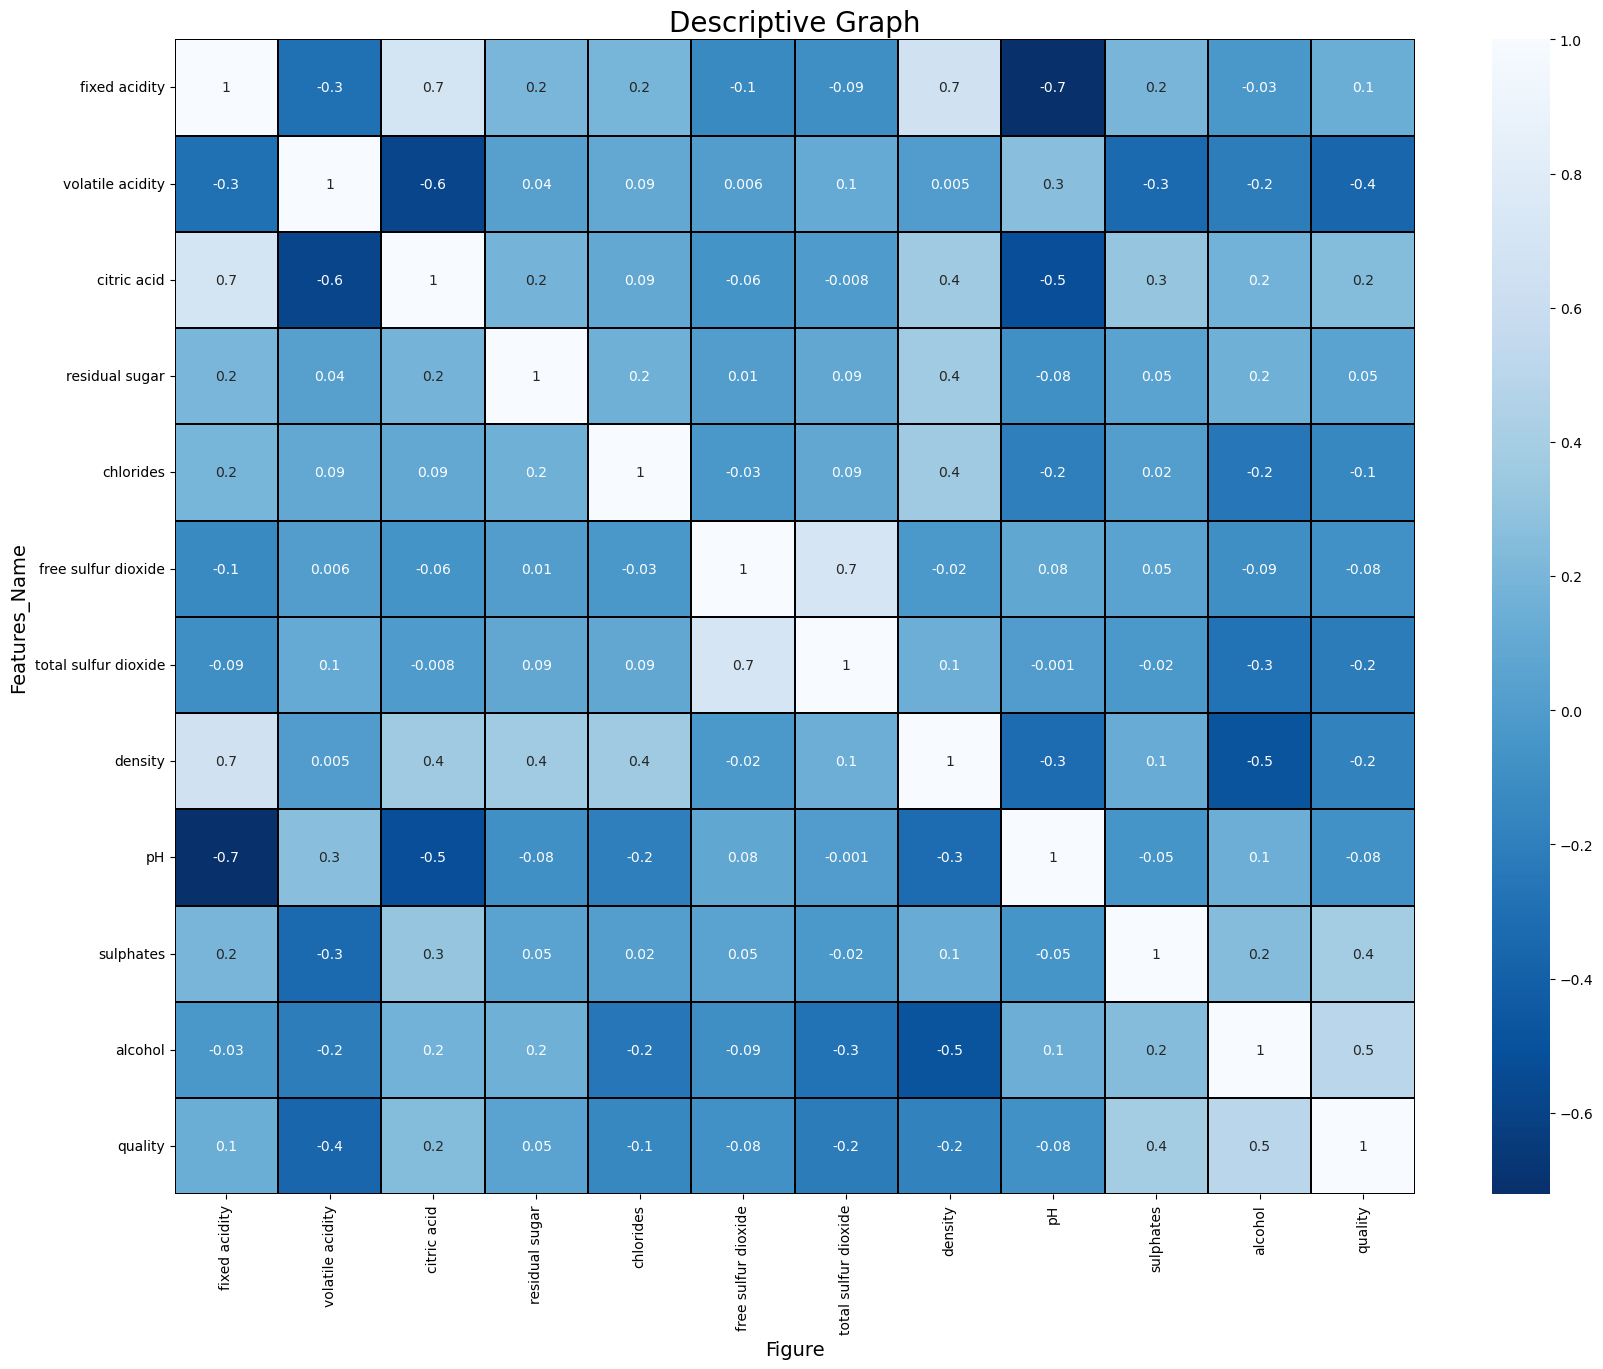

In [64]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.xlabel('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph', fontsize =20)
plt.show()

#0- no relation, -0.3 to + 0.3  -less correlation , greater than 0.5 or greater than +0.5 -Moderate correaltion, Greater than -0.7 or greater than +0.7 high correlation 

In [65]:
df.corr().quality.sort_values(ascending = False)

quality                 1.000000
alcohol                 0.505716
sulphates               0.385837
citric acid             0.245672
fixed acidity           0.137805
residual sugar          0.047779
free sulfur dioxide    -0.076318
pH                     -0.078959
chlorides              -0.144387
density                -0.179034
total sulfur dioxide   -0.222687
volatile acidity       -0.359736
Name: quality, dtype: float64

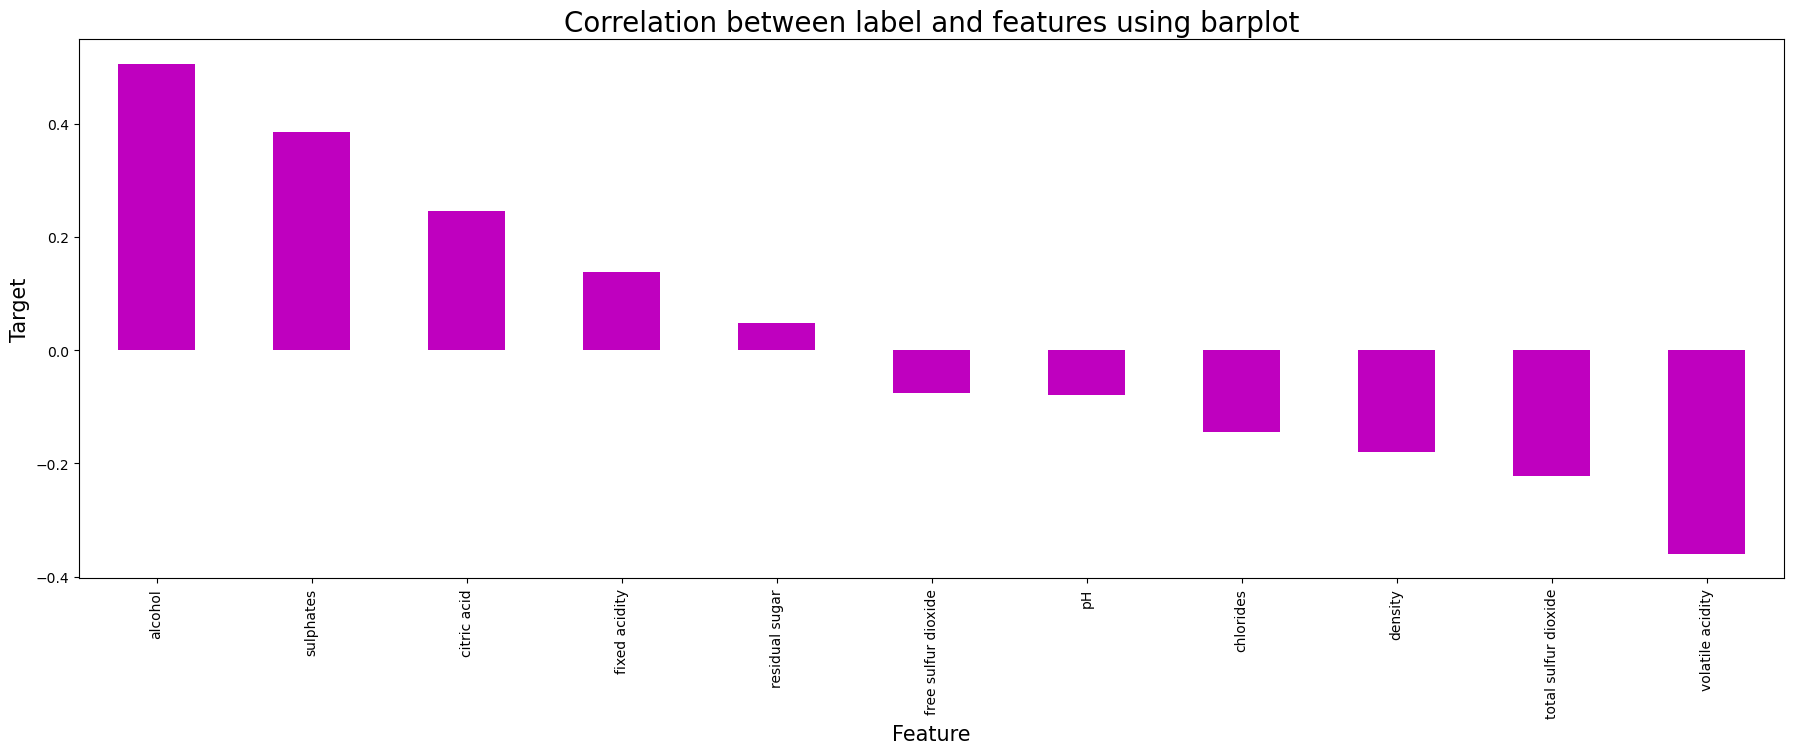

In [66]:
plt.figure(figsize = (22,7))
df.corr().quality.sort_values(ascending = False).drop(['quality']).plot(kind ='bar',color ="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features residual sugar and free sulfur dioxide have very less correlation with the column and alcohol ,volatile acidity have good correlation.

# Separating features and label(feature selection)

In [67]:
# If wine quality is 7 0r above  then will consider  as good quality wine.

df['goodquality']=[1 if x >= 7 else 0 for x in df['quality']]
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
70         1.974681             0.630         0.08        1.238562   0.423582   
75         2.064560             0.410         0.64        1.300591   0.453065   
863        1.930979             0.620         0.06        1.357209   0.427266   
890        1.930979             0.340         0.24        1.259921   0.414082   
1498       1.875777             0.895         0.04        1.320006   0.408166   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
70                   15.0              3.000000  0.99670  3.32       0.54   
75                    9.0              3.476027  0.99860  3.54       0.66   
863                  17.0              4.379519  0.99746  3.51       0.53   
890                  30.0              3.732511  0.99576  3.44       0.58   
1498                  7.0              2.351335  0.99582  3.53       0.58   

      alcohol  quality  goodquality  
70        9.5        6            0  
75       10.5        5            0  
863       9.7        5            0  
890      10.1        5            0  
1498     10.8        6            0

In [68]:
df['quality'].unique()

array([5, 6, 7, 4, 8], dtype=int64)

In [69]:
# Separating the independent and target variables into X and Y

x = df.drop(['quality','goodquality'], axis =1)
y= df['goodquality']
print("Features Dimension =",x.shape)
print('Label Dimension =', y.shape)

Features Dimension = (1232, 11)
Label Dimension = (1232,)


In [70]:
# Separating the independent and target variables into X and Y

x = df.drop(['quality','goodquality'], axis =1)
y= df['goodquality']
print("Features Dimension =",x.shape)
print('Label Dimension =', y.shape)

Features Dimension = (1232, 11)
Label Dimension = (1232,)


why we are separting the feature and label, we need to separate the features independent variable and dependent variable.so that we can divinde the data set int 4 part

train data : x-train and y-train

test data: x-test and y -test

In [71]:
# see the total number of good vs bad wine sample
df['goodquality'].value_counts()

0    1063
1     169
Name: goodquality, dtype: int64

In [72]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          1.948695             0.700         0.00        1.238562   0.423582   
1          1.983192             0.880         0.00        1.375069   0.461044   
2          1.983192             0.760         0.04        1.320006   0.451436   
3          2.237378             0.280         0.56        1.238562   0.421716   
5          1.948695             0.660         0.00        1.216440   0.421716   
...             ...               ...          ...             ...        ...   
1593       1.894536             0.620         0.08        1.238562   0.408166   
1594       1.837091             0.600         0.08        1.259921   0.448140   
1595       1.806969             0.550         0.10        1.300591   0.395789   
1597       1.806969             0.645         0.12        1.259921   0.421716   
1598       1.817121             0.310         0.47        1.532619   0.406155   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0              3.239612  0.99780  3.51       0.56   
1                    25.0              4.061548  0.99680  3.20       0.68   
2                    15.0              3.779763  0.99700  3.26       0.65   
3                    17.0              3.914868  0.99800  3.16       0.58   
5                    13.0              3.419952  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0              3.361975  0.99651  3.42       0.82   
1594                 32.0              3.530348  0.99490  3.45       0.58   
1595                 39.0              3.708430  0.99512  3.52       0.76   
1597                 32.0              3.530348  0.99547  3.57       0.71   
1598                 18.0              3.476027  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
5         9.4  
...       ...  
1593      9.5  
1594     10.5  
1595     11.2  
1597     10.2  
1598     11.0  

[1232 rows x 11 columns]

In [73]:
print(y)

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: goodquality, Length: 1232, dtype: int64


# Modelling

In [74]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
# importing necessary libraries:

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
# finding the best Random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit( x_train, y_train)
    pred =lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is",maxAccu, "on Random_state",maxRS)

Maximum r2 score is 0.3378168056194234 on Random_state 135


# Features importance

# Creating/splitting train test split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= maxRS)

In [80]:
model_result=pd.DataFrame(columns=['Model','Score'])

In [81]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['LogisticRegression',r2_score(y_test,pred_model)]
model_result

Model     Score
0  LogisticRegression  0.079907

In [82]:
from sklearn.neighbors import KNeighborsRegressor as KNN
model=KNN()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['KNN',r2_score(y_test,pred_model)]
model_result

Model     Score
0  LogisticRegression  0.079907
1                 KNN  0.217308

In [83]:
from sklearn.svm import SVR

model=SVR()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['SVR',r2_score(y_test,pred_model)]

model_result

Model     Score
0  LogisticRegression  0.079907
1                 KNN  0.217308
2                 SVR -0.022595

In [84]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['DecisionTreeRegressor',r2_score(y_test,pred_model)]
model_result

Model     Score
0     LogisticRegression  0.079907
1                    KNN  0.217308
2                    SVR -0.022595
3  DecisionTreeRegressor -0.267683

In [85]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['RandomForestRegressor',r2_score(y_test,pred_model)]
model_result

Model     Score
0     LogisticRegression  0.079907
1                    KNN  0.217308
2                    SVR -0.022595
3  DecisionTreeRegressor -0.267683
4  RandomForestRegressor  0.411924

In [86]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['GradientBoostingRegressor',r2_score(y_test,pred_model)]

In [87]:
model_result

Model     Score
0         LogisticRegression  0.079907
1                        KNN  0.217308
2                        SVR -0.022595
3      DecisionTreeRegressor -0.267683
4      RandomForestRegressor  0.411924
5  GradientBoostingRegressor  0.362014

In [88]:

model=Ridge()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['Ridge',r2_score(y_test,pred_model)]
model_result

Model     Score
0         LogisticRegression  0.079907
1                        KNN  0.217308
2                        SVR -0.022595
3      DecisionTreeRegressor -0.267683
4      RandomForestRegressor  0.411924
5  GradientBoostingRegressor  0.362014
6                      Ridge  0.325432

In [89]:
from sklearn.linear_model import LogisticRegression
model=Lasso()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['Lasso',r2_score(y_test,pred_model)]

In [90]:
model_result

Model     Score
0         LogisticRegression  0.079907
1                        KNN  0.217308
2                        SVR -0.022595
3      DecisionTreeRegressor -0.267683
4      RandomForestRegressor  0.411924
5  GradientBoostingRegressor  0.362014
6                      Ridge  0.325432
7                      Lasso -0.005925

In [91]:
model=LinearRegression()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['LinearRegression',r2_score(y_test,pred_model)]
model_result

Model     Score
0         LogisticRegression  0.079907
1                        KNN  0.217308
2                        SVR -0.022595
3      DecisionTreeRegressor -0.267683
4      RandomForestRegressor  0.411924
5  GradientBoostingRegressor  0.362014
6                      Ridge  0.325432
7                      Lasso -0.005925
8           LinearRegression  0.337817

In [92]:
model_result = model_result.sort_values(by='Score',ascending=False)
model_result

Model     Score
4      RandomForestRegressor  0.411924
5  GradientBoostingRegressor  0.362014
8           LinearRegression  0.337817
6                      Ridge  0.325432
1                        KNN  0.217308
0         LogisticRegression  0.079907
7                      Lasso -0.005925
2                        SVR -0.022595
3      DecisionTreeRegressor -0.267683

In [93]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor

In [94]:
# Define the hyperparameter grid

param = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
    'random_state': [1, 4, 10, 20]   # Random seed for reproducibility
}

#Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV with the model and hyperparameter grid
gscv = GridSearchCV(estimator=rf_model, param_grid=param, cv=5)

# Fit the GridSearchCV object to your training data
gscv.fit(x_train, y_train)


# Access the best hyperparameters and best model
best_params = gscv.best_params_
best_model = gscv.best_estimator_

# Now you can use the best model to make predictions on your test data, etc.

In [95]:
gscv.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 10}

# RandomForestRegressor is the best model